In [174]:
import pandas as pd
import numpy as np
import sqlite3

In [175]:
import matplotlib.pyplot as plt

In [176]:
#nltk
import nltk
print(nltk.__version__)

3.8.1


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

In [178]:
from gensim.models import Word2Vec

In [ ]:
pip install gensim

In [179]:
#gensim
#pip install cython
#pip install Xcode Command Line Tools
#python setup.py build_ext --inplace
#pip install gensim
import gensim
print(gensim.__version__)


4.3.2


## Extraction d'un data frame contenant l'ensembles des données de la BD, en utilisant du SQL:

In [180]:

connexion = sqlite3.connect('Database.db')
cursor = connexion.cursor()

query = '''SELECT 
    offres.intitule,
    offres.description_offre,
    offres.date_creation,
    offres.salaire_min_annuel,
    offres.salaire_max_annuel,
    offres.salaire_annuel_mean,
    offres.qualification_libelle,
    offres.experience,
    offres.type_contrat,
    offres.secteur_activite,
    d_ville.ville,
    d_ville.latitude,
    d_ville.longitude,
    d_ville.code_postal,
    d_ville.departement AS ville_departement,
    d_entreprise.entreprise_nom,
    d_entreprise.entreprise_description,
    h_departement.departement,
    h_departement.departement_nom,
    h_departement.region
        
    FROM offres
    JOIN d_ville ON offres.id_ville = d_ville.id
    JOIN d_entreprise ON offres.id_entreprise = d_entreprise.id
    JOIN h_departement ON d_ville.departement = h_departement.departement;
'''
df = pd.read_sql_query(query, connexion)

connexion.close()

In [181]:
df.head()

,intitule,description_offre,date_creation,salaire_min_annuel,salaire_max_annuel,salaire_annuel_mean,qualification_libelle,experience,type_contrat,secteur_activite,ville,latitude,longitude,code_postal,ville_departement,entreprise_nom,entreprise_description,departement,departement_nom,region
0,Senior Data Engineer F/H (H/F),"Le saviez-vous ?\n\nNous rejoindre, c'est rejo...",29/12/2023,None,None,None,None,oui,CDI,Autres activités informatiques,MASSY,49.687882,1.395968,76270.0,seine-maritime,None,"Nous rejoindre, c'est rejoindre l'un des leade...",seine-maritime,None,normandie
1,Data Engineer H/F,"Rejoindre le Groupe IRCEM, c'est participer à ...",29/12/2023,None,None,None,None,oui,CDI,None,ROUBAIX,50.688369,3.181903,59100.0,nord,IRCEM,None,nord,None,hauts-de-france
2,Analytics Engineer F/H - Marketing (H/F),Descriptif du poste:\n\nRôle : L Analytics Eng...,29/12/2023,None,None,None,Cadre,oui,CDI,Restauration de type rapide,ORLY,48.742795,2.394977,94310.0,val-de-marne,CPF,"Depuis 2002, Amorino émerveille les gourmands ...",val-de-marne,None,île-de-france
3,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,ORLEANS,47.873504,1.917316,45100.0,loiret,DSI Pôle Emploi,None,loiret,None,centre-val de loire
4,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,AIX EN PROVENCE,43.536112,5.398630,13080.0,bouches-du-rhône,DSI Pôle Emploi,None,bouches-du-rhône,None,provence-alpes-côte d'azur


In [182]:
df['intitule'].unique()

array(['Senior Data Engineer F/H (H/F)', 'Data Engineer H/F',
       'Analytics Engineer F/H - Marketing (H/F)', 'DATA ENGINEER - H/F',
       'DATA ENGINEER GCP - Java (H/F)', 'DATA ENGINEER (H/F)',
       'DATA ENGINEER CLOUD (H/F/NB)', 'Data Engineer/BI (H/F)',
       'Data Engineer - (H/F)', 'Data Engineer Hadoop / POEI (H/F)',
       'Data Engineer (H/F)', 'Data Engineer- F/H - Comptabilité (H/F)',
       'Data engineer F/H - Système, réseaux, données (H/F)',
       'Technical Data Engineer Confirmed (H/F)',
       'Data Engineer Senior (H/F)',
       'Technical Data Engineer Senior (H/F)',
       'Technical Data Engineer (H/F)',
       'Data Engineer AWS Spark - Nantes (IT) / Freelance (H/F)',
       'DATA ENGINEER - BUSINESS INTELLIGENCE (H/F)',
       'Senior Data Engineer (H/F)', 'DATA ENGINEER H/F',
       'Data Engineer / DevOps F/H - Informatique de gestion (H/F)',
       'Data Engineer - Spark Scala Hadoop (H/F)',
       'DATA ENGINEER CLOUD (H/F)', 'Data engineer  F/H - H

## Création de la variable 'poste': qui prend 'data scientist' ou 'data engineer'

In [183]:
def categorize_poste(row):
    intitule_lower = row['intitule'].lower()
    if 'data scientist' in intitule_lower or 'ingénieur data scientist' in intitule_lower:
        return 'data scientist'
    elif 'data engineer' in intitule_lower or 'engineer' in intitule_lower or 'ingénieur' in intitule_lower or 'engineering' in intitule_lower :
        return 'data engineer'


# Apply the categorize_poste function to create the 'poste' column
df['poste'] = df.apply(categorize_poste, axis=1)

In [184]:
df.head()

,intitule,description_offre,date_creation,salaire_min_annuel,salaire_max_annuel,salaire_annuel_mean,qualification_libelle,experience,type_contrat,secteur_activite,...,latitude,longitude,code_postal,ville_departement,entreprise_nom,entreprise_description,departement,departement_nom,region,poste
0,Senior Data Engineer F/H (H/F),"Le saviez-vous ?\n\nNous rejoindre, c'est rejo...",29/12/2023,None,None,None,None,oui,CDI,Autres activités informatiques,...,49.687882,1.395968,76270.0,seine-maritime,None,"Nous rejoindre, c'est rejoindre l'un des leade...",seine-maritime,None,normandie,data engineer
1,Data Engineer H/F,"Rejoindre le Groupe IRCEM, c'est participer à ...",29/12/2023,None,None,None,None,oui,CDI,None,...,50.688369,3.181903,59100.0,nord,IRCEM,None,nord,None,hauts-de-france,data engineer
2,Analytics Engineer F/H - Marketing (H/F),Descriptif du poste:\n\nRôle : L Analytics Eng...,29/12/2023,None,None,None,Cadre,oui,CDI,Restauration de type rapide,...,48.742795,2.394977,94310.0,val-de-marne,CPF,"Depuis 2002, Amorino émerveille les gourmands ...",val-de-marne,None,île-de-france,data engineer
3,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,...,47.873504,1.917316,45100.0,loiret,DSI Pôle Emploi,None,loiret,None,centre-val de loire,data engineer
4,DATA ENGINEER - H/F,Description :\n\n\nvous rejoindrez une équipe ...,28/12/2023,45000.0,55000.0,50000.0,None,oui,CDI,Administration publique (tutelle) des activité...,...,43.536112,5.398630,13080.0,bouches-du-rhône,DSI Pôle Emploi,None,bouches-du-rhône,None,provence-alpes-côte d'azur,data engineer


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                294 non-null    object 
 1   description_offre       294 non-null    object 
 2   date_creation           294 non-null    object 
 3   salaire_min_annuel      65 non-null     object 
 4   salaire_max_annuel      59 non-null     object 
 5   salaire_annuel_mean     65 non-null     object 
 6   qualification_libelle   193 non-null    object 
 7   experience              294 non-null    object 
 8   type_contrat            294 non-null    object 
 9   secteur_activite        223 non-null    object 
 10  ville                   294 non-null    object 
 11  latitude                294 non-null    float64
 12  longitude               294 non-null    float64
 13  code_postal             294 non-null    object 
 14  ville_departement       294 non-null    ob

In [188]:
#Regarder les lignes qui n'ont pas de données dans 'poste'
filtered_df = df.loc[df['poste'].isna(), ['poste', 'intitule', 'description_offre']]
print(filtered_df)

    poste                                           intitule  \
97   None                      Consultant Data - AIX ((H/F))   
98   None  Data Steward - Responsable gestion de données ...   
99   None  STAGE_Marketing strategy and tech analyst F/H ...   
104  None  Stagiaire Project Manager Dashboard Ops e-comm...   
117  None               Data & AI Strategy Manager F/H (H/F)   
119  None                         Développeur Java F/H (H/F)   
133  None  Expert big data / Hadoop / Cloudera (Rodez) H/...   
134  None  Data analyste informatique (H/F) (IT) / Freelance   
135  None  Data analyste informatique (H/F) (IT) / Freelance   
145  None  SAP Master Data Expert F/H - Système, réseaux,...   
147  None                           Data Analyst (F/H) (H/F)   
153  None  DATA analyste informatique EXPERT SQL (IT) / F...   
154  None                       Responsable de Pôle Data H/F   
157  None                Data Analyst RSE confirmé F/H (H/F)   
168  None  Data analyste informatique Py

# On enlève les offres qui ne sont pas catégorisées en 'data scientist' ni 'data engineer':

In [190]:
df.dropna(subset=['poste'], inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 292
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                271 non-null    object 
 1   description_offre       271 non-null    object 
 2   date_creation           271 non-null    object 
 3   salaire_min_annuel      63 non-null     object 
 4   salaire_max_annuel      57 non-null     object 
 5   salaire_annuel_mean     63 non-null     object 
 6   qualification_libelle   182 non-null    object 
 7   experience              271 non-null    object 
 8   type_contrat            271 non-null    object 
 9   secteur_activite        214 non-null    object 
 10  ville                   271 non-null    object 
 11  latitude                271 non-null    float64
 12  longitude               271 non-null    float64
 13  code_postal             271 non-null    object 
 14  ville_departement       271 non-null    object 

In [192]:
df['poste'].value_counts()

poste
data engineer     167
data scientist    104
Name: count, dtype: int64

## Word2Vec sur description_offre pour 'data scientist' (à faire sur 'poste'!)

In [56]:
data_scientist_df= df.loc[df['poste'] == 'data scientist']
#data_scientist_df_test = df.loc[df['poste'] == 'data scientist', ['poste', 'intitule']]
#print(data_scientist_df_test)

In [57]:
data_scientist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 50 to 292
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                104 non-null    object 
 1   description_offre       104 non-null    object 
 2   date_creation           104 non-null    object 
 3   salaire_min_annuel      23 non-null     object 
 4   salaire_max_annuel      21 non-null     object 
 5   salaire_annuel_mean     23 non-null     object 
 6   qualification_libelle   66 non-null     object 
 7   experience              104 non-null    object 
 8   type_contrat            104 non-null    object 
 9   secteur_activite        77 non-null     object 
 10  ville                   104 non-null    object 
 11  latitude                104 non-null    float64
 12  longitude               104 non-null    float64
 13  code_postal             104 non-null    object 
 14  ville_departement       104 non-null    object

In [58]:
# Add a new column 'ID' starting from 1
data_scientist_df['ID'] = range(1, len(data_scientist_df) + 1)
data_scientist_df = data_scientist_df[['ID'] + [col for col in data_scientist_df.columns if col != 'ID']]

/var/folders/sj/kc5dv8dd4_18gtz7tjx528p40000gn/T/ipykernel_5762/2523644901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist_df['ID'] = range(1, len(data_scientist_df) + 1)


In [59]:
data_scientist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 50 to 292
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      104 non-null    int64  
 1   intitule                104 non-null    object 
 2   description_offre       104 non-null    object 
 3   date_creation           104 non-null    object 
 4   salaire_min_annuel      23 non-null     object 
 5   salaire_max_annuel      21 non-null     object 
 6   salaire_annuel_mean     23 non-null     object 
 7   qualification_libelle   66 non-null     object 
 8   experience              104 non-null    object 
 9   type_contrat            104 non-null    object 
 10  secteur_activite        77 non-null     object 
 11  ville                   104 non-null    object 
 12  latitude                104 non-null    float64
 13  longitude               104 non-null    float64
 14  code_postal             104 non-null    object

In [60]:
DS= data_scientist_df.copy()

# Nettoyage du corpus

In [61]:
#récupérer sous forme de liste
corpus = DS['description_offre'].tolist()
print(corpus[0])

PRESENTATION D'ELIPCE :
Expert(e) en développement logiciel & data et interprétation métier, Elipce se positionne sur 3 axes : efficacité opérationnelle, business intelligence et centre de services logiciels.
Pour accompagner nos clients, nous créons des solutions digitales adaptées, qui correspondent à leur fonctionnement et à la réalité de leur entreprise. 
Nous proposons également des solutions d'externalisation permettant d'assurer la maintenance, l'évolution ou le développement d'applications logicielles pour le compte de nos clients, via la mise à disposition de pool de compétences au sein des équipes client et sur nos plateaux techniques.
Nous nous engageons à fournir des solutions de qualité, à promouvoir l'innovation et à cultiver une véritable cohésion au sein de notre équipe.
DESCRIPTION DU POSTE : 
Au sein d'une équipe, vous assurez le cycle de vie des applications développées avec de grands challenges techniques et organisationnels pour accompagner nos clients dans la tran

In [62]:
#passer en minuscule
corpus = [doc.lower() for doc in corpus]
print(corpus[0])

presentation d'elipce :
expert(e) en développement logiciel & data et interprétation métier, elipce se positionne sur 3 axes : efficacité opérationnelle, business intelligence et centre de services logiciels.
pour accompagner nos clients, nous créons des solutions digitales adaptées, qui correspondent à leur fonctionnement et à la réalité de leur entreprise. 
nous proposons également des solutions d'externalisation permettant d'assurer la maintenance, l'évolution ou le développement d'applications logicielles pour le compte de nos clients, via la mise à disposition de pool de compétences au sein des équipes client et sur nos plateaux techniques.
nous nous engageons à fournir des solutions de qualité, à promouvoir l'innovation et à cultiver une véritable cohésion au sein de notre équipe.
description du poste : 
au sein d'une équipe, vous assurez le cycle de vie des applications développées avec de grands challenges techniques et organisationnels pour accompagner nos clients dans la tran

In [63]:
# Retirer les chiffres dans l'ensemble du corpus
chiffres = list("0123456789")
#print(chiffres)
corpus= ["".join([mot for mot in list(doc) if not mot in chiffres]) for doc in corpus]
print(corpus[0])

presentation d'elipce :
expert(e) en développement logiciel & data et interprétation métier, elipce se positionne sur  axes : efficacité opérationnelle, business intelligence et centre de services logiciels.
pour accompagner nos clients, nous créons des solutions digitales adaptées, qui correspondent à leur fonctionnement et à la réalité de leur entreprise. 
nous proposons également des solutions d'externalisation permettant d'assurer la maintenance, l'évolution ou le développement d'applications logicielles pour le compte de nos clients, via la mise à disposition de pool de compétences au sein des équipes client et sur nos plateaux techniques.
nous nous engageons à fournir des solutions de qualité, à promouvoir l'innovation et à cultiver une véritable cohésion au sein de notre équipe.
description du poste : 
au sein d'une équipe, vous assurez le cycle de vie des applications développées avec de grands challenges techniques et organisationnels pour accompagner nos clients dans la trans

In [64]:
#liste des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [65]:
#retrait des ponctuations
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
print(corpus[0])

presentation delipce 
experte en développement logiciel  data et interprétation métier elipce se positionne sur  axes  efficacité opérationnelle business intelligence et centre de services logiciels
pour accompagner nos clients nous créons des solutions digitales adaptées qui correspondent à leur fonctionnement et à la réalité de leur entreprise 
nous proposons également des solutions dexternalisation permettant dassurer la maintenance lévolution ou le développement dapplications logicielles pour le compte de nos clients via la mise à disposition de pool de compétences au sein des équipes client et sur nos plateaux techniques
nous nous engageons à fournir des solutions de qualité à promouvoir linnovation et à cultiver une véritable cohésion au sein de notre équipe
description du poste  
au sein dune équipe vous assurez le cycle de vie des applications développées avec de grands challenges techniques et organisationnels pour accompagner nos clients dans la transformation de leurs si
mis

In [66]:
#enlever les "\n":
corpus = [s.replace("\n","") for s in corpus]
print(corpus)

['presentation delipce experte en développement logiciel  data et interprétation métier elipce se positionne sur  axes  efficacité opérationnelle business intelligence et centre de services logicielspour accompagner nos clients nous créons des solutions digitales adaptées qui correspondent à leur fonctionnement et à la réalité de leur entreprise nous proposons également des solutions dexternalisation permettant dassurer la maintenance lévolution ou le développement dapplications logicielles pour le compte de nos clients via la mise à disposition de pool de compétences au sein des équipes client et sur nos plateaux techniquesnous nous engageons à fournir des solutions de qualité à promouvoir linnovation et à cultiver une véritable cohésion au sein de notre équipedescription du poste  au sein dune équipe vous assurez le cycle de vie des applications développées avec de grands challenges techniques et organisationnels pour accompagner nos clients dans la transformation de leurs simissions

In [67]:
#nécessité de punkt - modèle de tokénisation
#à charger en ligne si ce n'est pas déjà fait
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natachaperez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
#transformer le corpus en liste de listes (les documents)
#par tokénisation
corpus_tk = [word_tokenize(doc) for doc in corpus]

#avant
#print(corpus[0])

#après tokénisation
#print('\n')
print(corpus_tk[0])

['presentation', 'delipce', 'experte', 'en', 'développement', 'logiciel', 'data', 'et', 'interprétation', 'métier', 'elipce', 'se', 'positionne', 'sur', 'axes', 'efficacité', 'opérationnelle', 'business', 'intelligence', 'et', 'centre', 'de', 'services', 'logicielspour', 'accompagner', 'nos', 'clients', 'nous', 'créons', 'des', 'solutions', 'digitales', 'adaptées', 'qui', 'correspondent', 'à', 'leur', 'fonctionnement', 'et', 'à', 'la', 'réalité', 'de', 'leur', 'entreprise', 'nous', 'proposons', 'également', 'des', 'solutions', 'dexternalisation', 'permettant', 'dassurer', 'la', 'maintenance', 'lévolution', 'ou', 'le', 'développement', 'dapplications', 'logicielles', 'pour', 'le', 'compte', 'de', 'nos', 'clients', 'via', 'la', 'mise', 'à', 'disposition', 'de', 'pool', 'de', 'compétences', 'au', 'sein', 'des', 'équipes', 'client', 'et', 'sur', 'nos', 'plateaux', 'techniquesnous', 'nous', 'engageons', 'à', 'fournir', 'des', 'solutions', 'de', 'qualité', 'à', 'promouvoir', 'linnovation', '

In [69]:
#Lemmatisation
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lm[0])

['presentation', 'delipce', 'experte', 'en', 'développement', 'logiciel', 'data', 'et', 'interprétation', 'métier', 'elipce', 'se', 'positionne', 'sur', 'ax', 'efficacité', 'opérationnelle', 'business', 'intelligence', 'et', 'centre', 'de', 'service', 'logicielspour', 'accompagner', 'no', 'client', 'nous', 'créons', 'de', 'solution', 'digitales', 'adaptées', 'qui', 'correspondent', 'à', 'leur', 'fonctionnement', 'et', 'à', 'la', 'réalité', 'de', 'leur', 'entreprise', 'nous', 'proposons', 'également', 'de', 'solution', 'dexternalisation', 'permettant', 'dassurer', 'la', 'maintenance', 'lévolution', 'ou', 'le', 'développement', 'dapplications', 'logicielles', 'pour', 'le', 'compte', 'de', 'no', 'client', 'via', 'la', 'mise', 'à', 'disposition', 'de', 'pool', 'de', 'compétences', 'au', 'sein', 'de', 'équipes', 'client', 'et', 'sur', 'no', 'plateau', 'techniquesnous', 'nous', 'engageons', 'à', 'fournir', 'de', 'solution', 'de', 'qualité', 'à', 'promouvoir', 'linnovation', 'et', 'à', 'culti

In [71]:
#charger les stopwords
mots_vides = stopwords.words('french')
#print(mots_vides)

In [72]:
#suppression des mots-vides
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm]

#vérification - origine
print(corpus_lm[0])

#sans les stopwords
print('\n')
print(corpus_sw[0])

['presentation', 'delipce', 'experte', 'en', 'développement', 'logiciel', 'data', 'et', 'interprétation', 'métier', 'elipce', 'se', 'positionne', 'sur', 'ax', 'efficacité', 'opérationnelle', 'business', 'intelligence', 'et', 'centre', 'de', 'service', 'logicielspour', 'accompagner', 'no', 'client', 'nous', 'créons', 'de', 'solution', 'digitales', 'adaptées', 'qui', 'correspondent', 'à', 'leur', 'fonctionnement', 'et', 'à', 'la', 'réalité', 'de', 'leur', 'entreprise', 'nous', 'proposons', 'également', 'de', 'solution', 'dexternalisation', 'permettant', 'dassurer', 'la', 'maintenance', 'lévolution', 'ou', 'le', 'développement', 'dapplications', 'logicielles', 'pour', 'le', 'compte', 'de', 'no', 'client', 'via', 'la', 'mise', 'à', 'disposition', 'de', 'pool', 'de', 'compétences', 'au', 'sein', 'de', 'équipes', 'client', 'et', 'sur', 'no', 'plateau', 'techniquesnous', 'nous', 'engageons', 'à', 'fournir', 'de', 'solution', 'de', 'qualité', 'à', 'promouvoir', 'linnovation', 'et', 'à', 'culti

In [73]:
#retirer les token de moins de 3 lettres
corpus_sw = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_sw]
print(corpus_sw[0])

['presentation', 'delipce', 'experte', 'développement', 'logiciel', 'data', 'interprétation', 'métier', 'elipce', 'positionne', 'efficacité', 'opérationnelle', 'business', 'intelligence', 'centre', 'service', 'logicielspour', 'accompagner', 'client', 'créons', 'solution', 'digitales', 'adaptées', 'correspondent', 'fonctionnement', 'réalité', 'entreprise', 'proposons', 'également', 'solution', 'dexternalisation', 'permettant', 'dassurer', 'maintenance', 'lévolution', 'développement', 'dapplications', 'logicielles', 'compte', 'client', 'via', 'mise', 'disposition', 'pool', 'compétences', 'sein', 'équipes', 'client', 'plateau', 'techniquesnous', 'engageons', 'fournir', 'solution', 'qualité', 'promouvoir', 'linnovation', 'cultiver', 'véritable', 'cohésion', 'sein', 'équipedescription', 'poste', 'sein', 'dune', 'équipe', 'assurez', 'cycle', 'vie', 'application', 'développées', 'grand', 'challenge', 'technique', 'organisationnels', 'accompagner', 'client', 'transformation', 'leurs', 'simissi

In [74]:
print(corpus_sw[1])

['description', 'poste', 'sein', 'dune', 'équipe', 'assurez', 'cycle', 'vie', 'application', 'développées', 'grand', 'challenge', 'technique', 'organisationnels', 'accompagner', 'client', 'transformation', 'leurs', 'simissions', 'principales', 'modéliser', 'traiter', 'transformer', 'données', 'complexesconcevoir', 'solution', 'stockage', 'données', 'modèle', 'étoiledévelopper', 'connecteurs', 'passerelles', 'données', 'laide', 'outils', 'etl', 'talendlire', 'comprendre', 'rédiger', 'document', 'technique', 'lien', 'poste', 'data', 'architect', 'data', 'engineer', 'dictionnaire', 'données', 'modélisation', 'merise', 'uml', 'matrice', 'busrester', 'jour', 'veille', 'différentes', 'technology', 'méthodes', 'liées', 'poste', 'data', 'architect', 'data', 'engineer', 'biais', 'lauto', 'formation', 'formation', 'professionnelledes', 'compétences', 'machine', 'learning', 'sen', 'large', 'appréciéesprofil', 'recherché', 'data', 'architect', 'data', 'engineer', 'data', 'scientist', 'confirmé', '

In [89]:
#outil pour stemming - racinisation des termes, mais en français avec SnowballStemmer ("french"): c'est pas terrible!
#stemmer_fr = SnowballStemmer("french")

#transformation par racinisation des mots:
#corpus_stem = [[stemmer_fr.stem(mot) for mot in doc] for doc in corpus_sw]
#print(corpus_stem[0])

['present', 'delipc', 'expert', 'développ', 'logiciel', 'dat', 'interpret', 'méti', 'elipc', 'position', 'efficac', 'opérationnel', 'business', 'intelligent', 'centr', 'servic', 'logiciel', 'accompagn', 'client', 'créon', 'solut', 'digital', 'adapt', 'correspondent', 'fonction', 'réalit', 'entrepris', 'proposon', 'égal', 'solut', 'dexternalis', 'permet', 'dassur', 'mainten', 'lévolu', 'développ', 'dappliqu', 'logiciel', 'compt', 'client', 'vi', 'mis', 'disposit', 'pool', 'compétent', 'sein', 'équip', 'client', 'plateau', 'techniqu', 'engageon', 'fourn', 'solut', 'qualit', 'promouvoir', 'linnov', 'cultiv', 'vérit', 'cohes', 'sein', 'équip', 'descript', 'post', 'sein', 'dun', 'équip', 'assur', 'cycl', 'vi', 'appliqu', 'développ', 'grand', 'challeng', 'techniqu', 'organisationnel', 'accompagn', 'client', 'transform', 'leur', 'mission', 'principal', 'modélis', 'trait', 'transform', 'don', 'complex', 'concevoir', 'solut', 'stockag', 'don', 'model', 'étoil', 'développ', 'connecteur', 'passer

# Word2Vec avec Gensim

In [75]:
#reformer les documents sous forme de chaîne
documents = [" ".join(doc) for doc in corpus_sw]
print(documents[0])

presentation delipce experte développement logiciel data interprétation métier elipce positionne efficacité opérationnelle business intelligence centre service logicielspour accompagner client créons solution digitales adaptées correspondent fonctionnement réalité entreprise proposons également solution dexternalisation permettant dassurer maintenance lévolution développement dapplications logicielles compte client via mise disposition pool compétences sein équipes client plateau techniquesnous engageons fournir solution qualité promouvoir linnovation cultiver véritable cohésion sein équipedescription poste sein dune équipe assurez cycle vie application développées grand challenge technique organisationnels accompagner client transformation leurs simissions principales modéliser traiter transformer données complexesconcevoir solution stockage données modèle étoiledévelopper connecteurs passerelles données laide outils etl talendlire comprendre rédiger document technique lien poste data

In [76]:
#word2vec
#from gensim.models import Word2Vec
#vector_size=2 pour projeter les termes dans 2 dimensions car je veux afficher une representation graphique
#window=5 : on regarde les 5 plus proche voisins: les 5 termes qui précède le token(mot) d'intérêt, et les 5 suivants
modele = Word2Vec(corpus_sw,vector_size=2,window=5)

In [77]:
#type de l'objet
print(type(modele))

<class 'gensim.models.word2vec.Word2Vec'>


In [78]:
#propriété de l'objet (méthodes):
#wv est important: word vector= transcription en vecteur des différents termes qui composent l'ensemble des documents
dir(modele)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_event',
 'add_null_word',
 'alpha',
 'batch_words',
 'build_vocab',
 'build_vocab_from_freq',
 'cbow_mean',
 'comment',
 'compute_loss',
 'corpus_count',
 

In [79]:
#propriété de "wv" -> wordvector
words = modele.wv

#type
print(type(words))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [80]:
#les propriétés:
dir(words)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [81]:
#affichage des termes de leur index
words.key_to_index

{'data': 0,
 'données': 1,
 'solution': 2,
 'mission': 3,
 'scientist': 4,
 'science': 5,
 'développement': 6,
 'modèles': 7,
 'client': 8,
 'learning': 9,
 'technique': 10,
 'plus': 11,
 'sein': 12,
 'machine': 13,
 'équipe': 14,
 'dune': 15,
 'service': 16,
 'dun': 17,
 'poste': 18,
 'recherche': 19,
 'projets': 20,
 'python': 21,
 'expérience': 22,
 'métiers': 23,
 'formation': 24,
 'équipes': 25,
 'compétences': 26,
 'léquipe': 27,
 'projet': 28,
 'groupe': 29,
 'algorithmes': 30,
 'développer': 31,
 'besoins': 32,
 'outils': 33,
 'production': 34,
 'notamment': 35,
 'environnement': 36,
 'participer': 37,
 'également': 38,
 'performance': 39,
 'afin': 40,
 'leurs': 41,
 'business': 42,
 'métier': 43,
 'engineer': 44,
 'être': 45,
 'direction': 46,
 'cadre': 47,
 'tant': 48,
 'chez': 49,
 'modélisation': 50,
 'travail': 51,
 'mise': 52,
 'produits': 53,
 'mettre': 54,
 'méthodes': 55,
 'veille': 56,
 'statistiques': 57,
 'technology': 58,
 'nouveaux': 59,
 'gestion': 60,
 'différen

In [82]:
words.vectors.shape

(902, 2)

In [83]:
#coordonnées du terme 'data'
vec1 = words['data']
print(vec1)

[4.4913917 1.4793843]


In [84]:
#coordonnées de 'analyser'
vec2 = words['analyser']
print(vec2)

[2.28792   1.2293696]


In [85]:
#similarité cosinus entre 'data' et 'analyser': pour voir si ils sont proche dans l'espace de représentation:
#ils sont proches car similarité proche de 1
words.similarity('data','analyser')

0.9847484

In [89]:
#les termes les plus proches de "data"
words.most_similar("data")

[('expérimenté', 1.0),
 ('liées', 0.9999999403953552),
 ('dun', 0.9999999403953552),
 ('marketing', 0.9999999403953552),
 ('maîtrise', 0.9999998807907104),
 ('participerez', 0.9999997615814209),
 ('recherchons', 0.9999991059303284),
 ('expérience', 0.9999989867210388),
 ('stratégiques', 0.9999982714653015),
 ('être', 0.9999979138374329)]

In [87]:
#plus proches de la conjonction de "data" et "anlyser"
#l'algo regarde le baricentre des deux termes et renvoie les termes les plus proches:
print(words.most_similar(positive=['data','analyser'],topn=4))

[('pay', 0.9999998211860657), ('développement', 0.9999995231628418), ('opérationnels', 0.9999983906745911), ('appliquées', 0.9999983310699463)]


In [90]:
#plus proches de "data", loin de ("analyser")
print(words.most_similar(positive=['data'],negative=['analyser'],topn=4))

[('dactivités', 0.9975885152816772), ('lart', 0.9971565008163452), ('compétence', 0.9836879372596741), ('activement', 0.9718143939971924)]


In [99]:
#récupérer les données dans un data frame
df = pd.DataFrame(words.vectors,columns=['V1','V2'],index=words.key_to_index.keys())
print(df)

                 V1        V2
data       4.491392  1.479384
données    4.667695  1.968462
solution   3.779600  1.074003
mission    3.578980  1.584622
scientist  2.933786  0.870230
...             ...       ...
politique  0.996916  0.569636
terraform  0.367041  0.045500
courant    0.735636 -0.163554
études     1.017359 -0.315529
langue     0.156077  0.305325

[902 rows x 2 columns]


In [101]:
#quelques mots clés
mots = ['engineer','scientist','data','données','analyser']
dfMots = df.loc[mots,:]
print(dfMots)

SyntaxError: invalid syntax (1515443288.py, line 2)

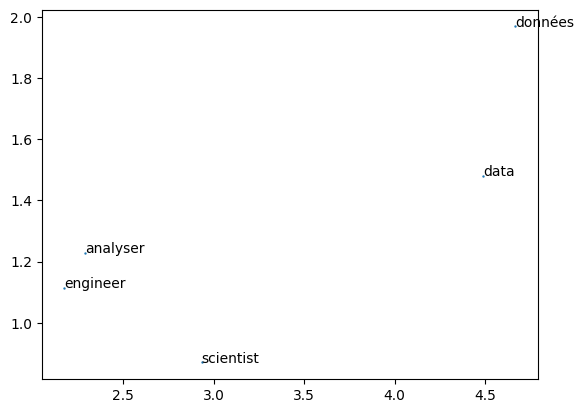

In [97]:
#graphique dans le plan
plt.scatter(dfMots.V1,dfMots.V2,s=0.5)
for i in range(dfMots.shape[0]):
    plt.annotate(dfMots.index[i],(dfMots.V1[i],dfMots.V2[i]))
plt.show()

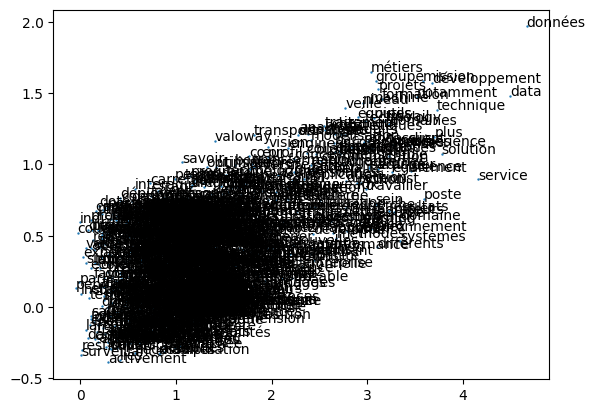

In [102]:
# Afficher l'ensemble des termes dans le graphique
plt.scatter(df.V1, df.V2, s=0.5)
for i in range(df.shape[0]):
    plt.annotate(df.index[i], (df.V1[i], df.V2[i]))

plt.show()

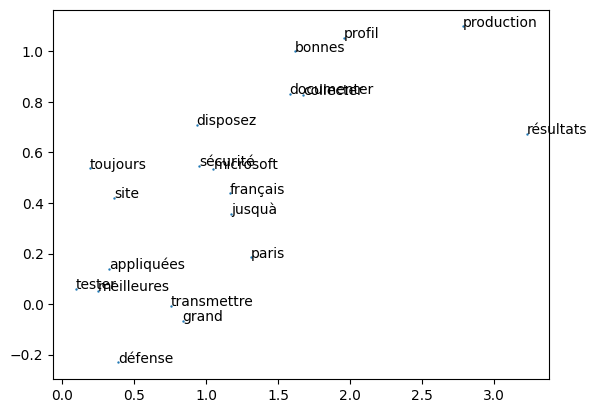

In [104]:
# Afficher les 20 premiers termes dans le graphique
dfSample = df.sample(n=20)
plt.scatter(dfSample.V1, dfSample.V2, s=0.5)
for i in range(dfSample.shape[0]):  # Afficher seulement les 20 premiers termes
    plt.annotate(dfSample.index[i], (dfSample.V1.iloc[i], dfSample.V2.iloc[i]))

plt.show()

In [ ]:
#on peut veut voir la proximité de termes dans le champ lexical de la donnée par exemple
#on peut voir également la proximité entre les termes 'engineer' et 'scientist', 'data', 'données' etc


## Création de la variable profil

Conserver la colonne 'profil' qu'on avait supprimé
À partir de 'description_offre' on extrait tout ce qui suit 'profil recherché' et on le met dans une nouvelle colonne 'profil_final'
Puis faire le word2vec et wordcloud sur cette nouvelle variable 'profil' (qui nous renseigne sur les compétences et outils que dois posséder le candidat) et comparer entre data scientist et data engineer.

In [165]:
jobs = pd.read_csv('Jobs.csv')

In [166]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                428 non-null    object 
 1   description_offre       428 non-null    object 
 2   dateCreation            428 non-null    object 
 3   typeContrat             428 non-null    object 
 4   experienceExige         281 non-null    object 
 5   secteurActiviteLibelle  278 non-null    object 
 6   qualificationLibelle    246 non-null    object 
 7   latitude                204 non-null    float64
 8   longitude               204 non-null    float64
 9   codePostal              197 non-null    float64
 10  commune                 247 non-null    float64
 11  departement             428 non-null    object 
 12  ville                   366 non-null    object 
 13  experienceOuiNon        428 non-null    object 
 14  entreprise_nom          288 non-null    ob

In [167]:
import re

In [168]:
# Fonction pour extraire le contenu après 'profil recherché'
def extraire_profil_recherche(description):
    # Utilisation d'une expression régulière pour trouver le texte après 'profil recherché'
    match = re.search(r'(?i)profil recherché', description)
    
    # Si la correspondance est trouvée, retourner le contenu après la correspondance
    if match:
        return description[match.end():].strip()
 

# Appliquer la fonction à la colonne 'description_offre', dont les lignes ne contiennent pas de données dans la colonne 'profils'
# Créer la nouvelle colonne 'profil_recherche'
mask = jobs['profils'].isnull() | (jobs['profils'] == '')
jobs.loc[mask, 'profil_recherche'] = jobs.loc[mask, 'description_offre'].apply(extraire_profil_recherche)


In [169]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                428 non-null    object 
 1   description_offre       428 non-null    object 
 2   dateCreation            428 non-null    object 
 3   typeContrat             428 non-null    object 
 4   experienceExige         281 non-null    object 
 5   secteurActiviteLibelle  278 non-null    object 
 6   qualificationLibelle    246 non-null    object 
 7   latitude                204 non-null    float64
 8   longitude               204 non-null    float64
 9   codePostal              197 non-null    float64
 10  commune                 247 non-null    float64
 11  departement             428 non-null    object 
 12  ville                   366 non-null    object 
 13  experienceOuiNon        428 non-null    object 
 14  entreprise_nom          288 non-null    ob

In [170]:
# Compter le nombre de lignes où 'profil_recherche' a du contenu et 'profils' n'en a pas
nombre_lignes = jobs[(jobs['profil_recherche'].notnull()) & (jobs['profils'].isnull())].shape[0]

# Afficher le résultat
print(f"Nombre de lignes avec contenu dans 'profil_recherche' mais sans contenu dans 'profils': {nombre_lignes}")

Nombre de lignes avec contenu dans 'profil_recherche' mais sans contenu dans 'profils': 88


In [171]:
# Fusionner le contenu de 'profils' et 'profil_recherche' dans 'profil_final'
jobs['profil_final'] = jobs.apply(lambda row: row['profils'] + ' ' + row['profil_recherche'] if pd.notnull(row['profils']) and pd.notnull(row['profil_recherche']) else row['profils'] if pd.notnull(row['profils']) else row['profil_recherche'], axis=1)
# Supprimer les colonnes 'profil_recherche' et 'profils':
jobs = jobs.drop(columns=['profil_recherche', 'profils'])
#Renommer la nouvelle variable 'profil_final' en 'profil':
jobs = jobs.rename(columns={'profil_final': 'profil'})

In [172]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   intitule                428 non-null    object 
 1   description_offre       428 non-null    object 
 2   dateCreation            428 non-null    object 
 3   typeContrat             428 non-null    object 
 4   experienceExige         281 non-null    object 
 5   secteurActiviteLibelle  278 non-null    object 
 6   qualificationLibelle    246 non-null    object 
 7   latitude                204 non-null    float64
 8   longitude               204 non-null    float64
 9   codePostal              197 non-null    float64
 10  commune                 247 non-null    float64
 11  departement             428 non-null    object 
 12  ville                   366 non-null    object 
 13  experienceOuiNon        428 non-null    object 
 14  entreprise_nom          288 non-null    ob

In [173]:
jobs.to_csv('jobs_combine.csv', index=False)